# Fernando Jimenez Pereyra
    A01734609

In [1]:
# !pip install pandas numpy matplotlib dataprep sklearn
# !pip install tensorflow-gpu

In [2]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

np.set_printoptions(precision=3, suppress=True)

In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

2022-09-14 16:08:27.636706: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-14 16:08:27.754145: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-14 16:08:28.167408: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-09-14 16:08:28.167453: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [4]:
# !pip install git+https://github.com/tensorflow/docs

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

In [5]:
from  IPython import display
from matplotlib import pyplot as plt

import numpy as np

import pathlib
import shutil
import tempfile

In [6]:
print('Tensorflow: ', tf.__version__)

Tensorflow:  2.10.0


In [7]:
df = pd.read_csv('./clean_fish.csv')
df = df.drop(columns=['Unnamed: 0'])
df

,onehotencoder__x0_Bream,onehotencoder__x0_Parkki,onehotencoder__x0_Perch,onehotencoder__x0_Pike,onehotencoder__x0_Roach,onehotencoder__x0_Smelt,onehotencoder__x0_Whitefish,Weight,Length1,Height,Width
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,242.0,23.2,11.5200,4.0200
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,290.0,24.0,12.4800,4.3056
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,340.0,23.9,12.3778,4.6961
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,363.0,26.3,12.7300,4.4555
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,430.0,26.5,12.4440,5.1340
...,...,...,...,...,...,...,...,...,...,...,...
154,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.2,11.5,2.0904,1.3936
155,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.4,11.7,2.4300,1.2690
156,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.2,12.1,2.2770,1.2558
157,0.0,0.0,0.0,0.0,0.0,1.0,0.0,19.7,13.2,2.8728,2.0672


In [8]:
train, test = train_test_split(df, test_size=0.33)

In [9]:
y_train = train['Weight']
y_test = test['Weight']
x_train = train.drop(columns=['Weight'])
x_test = test.drop(columns=['Weight'])

In [10]:
test_results = {}

In [11]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

In [12]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [13]:
normalizer.adapt(np.array(x_train))

2022-09-14 16:08:28.878016: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-14 16:08:28.884432: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-09-14 16:08:28.884449: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-09-14 16:08:28.885263: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

In [14]:
print(normalizer.mean.numpy())

[[ 0.264  0.066  0.33   0.075  0.123  0.104  0.038 25.517  9.146  4.364]]


In [15]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [16]:
x_train[:10]

,onehotencoder__x0_Bream,onehotencoder__x0_Parkki,onehotencoder__x0_Perch,onehotencoder__x0_Pike,onehotencoder__x0_Roach,onehotencoder__x0_Smelt,onehotencoder__x0_Whitefish,Length1,Height,Width
91,0.0,0.0,1.0,0.0,0.0,0.0,0.0,20.5,5.8560,3.6240
106,0.0,0.0,1.0,0.0,0.0,0.0,0.0,25.9,7.8204,4.2042
109,0.0,0.0,1.0,0.0,0.0,0.0,0.0,30.5,10.0300,6.0180
119,0.0,0.0,1.0,0.0,0.0,0.0,0.0,36.9,11.9286,7.1064
36,0.0,0.0,0.0,0.0,1.0,0.0,0.0,16.5,5.2983,2.8217
117,0.0,0.0,1.0,0.0,0.0,0.0,0.0,36.5,11.1366,6.0030
45,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20.5,7.0334,3.8203
96,0.0,0.0,1.0,0.0,0.0,0.0,0.0,22.0,7.2930,3.7230
127,0.0,0.0,1.0,0.0,0.0,0.0,0.0,41.1,12.4888,7.5958
143,0.0,0.0,0.0,1.0,0.0,0.0,0.0,56.0,9.6000,6.1440


In [17]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error',
    metrics=[tf.keras.metrics.Accuracy()])

In [18]:
%%time
history = linear_model.fit(
    x_train,
    y_train,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 2.09 s, sys: 186 ms, total: 2.27 s
Wall time: 2.02 s


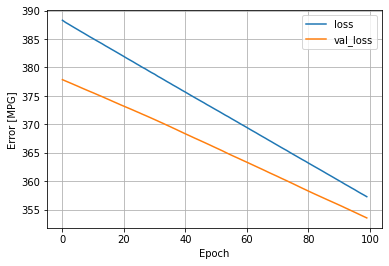

In [19]:
plot_loss(history)

In [20]:
test_results['linear_model'] = linear_model.evaluate(
    x_test, y_test, verbose=0)

In [21]:
test_results['linear_model']

[394.71942138671875, 0.0]

# Neural network

In [22]:
def compile_model(model):

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001), 
                metrics=[
                  tf.keras.losses.BinaryCrossentropy(
                      from_logits=True, name='binary_crossentropy'),
                  'accuracy'])
  return model

In [23]:
tiny_model = keras.Sequential([
        normalizer,
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
tiny_dnn_model = compile_model(tiny_model)
tiny_dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 10)               21        
 n)                                                              
                                                                 
 dense_1 (Dense)             (None, 64)                704       
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 790
Trainable params: 769
Non-trainable params: 21
_________________________________________________________________


In [24]:
%%time
history = tiny_dnn_model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 2.17 s, sys: 189 ms, total: 2.36 s
Wall time: 2.03 s


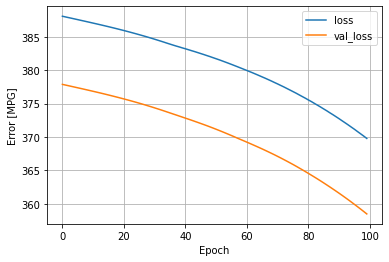

In [25]:
historys = {}
historys['tiny'] = history  
plot_loss(history)

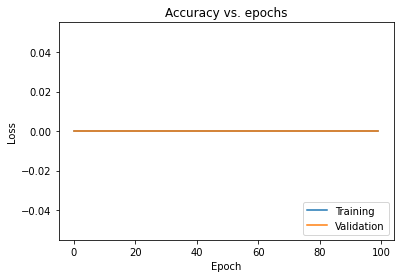

In [26]:
try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

In [27]:
test_results['tiny_dnn_model'] = tiny_dnn_model.evaluate(x_test, y_test, verbose=0)

2/2 [==============================] - 0s 2ms/step


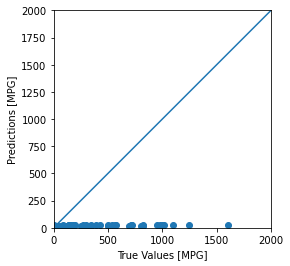

In [28]:
test_predictions = tiny_dnn_model.predict(x_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 2000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

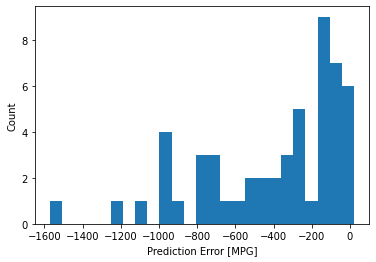

In [29]:
error = test_predictions - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [30]:
small_model = keras.Sequential([
        normalizer,
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
small_dnn_model = compile_model(small_model)

In [31]:
%%time
history = small_dnn_model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 2.2 s, sys: 241 ms, total: 2.44 s
Wall time: 2.08 s


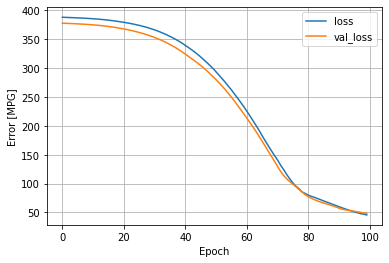

In [32]:
historys['small'] = history
plot_loss(history)

In [33]:
test_results['small_bdnn_model'] = small_dnn_model.evaluate(x_test, y_test, verbose=0)

2/2 [==============================] - 0s 2ms/step


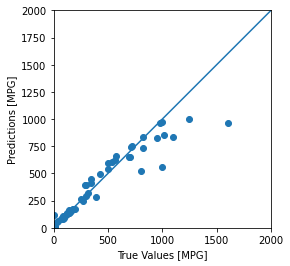

In [34]:
test_predictions = small_dnn_model.predict(x_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 2000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

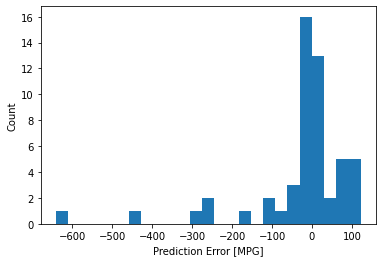

In [35]:
error = test_predictions - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [36]:
big_model = keras.Sequential([
        normalizer,
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(5, activation='relu'),
        layers.Dense(5, activation='relu'),
        layers.Dense(1)
    ])
big_dnn_model = compile_model(big_model)

In [37]:
%%time
history = big_dnn_model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=100)
historys['big'] = history

CPU times: user 2.31 s, sys: 223 ms, total: 2.53 s
Wall time: 2.1 s


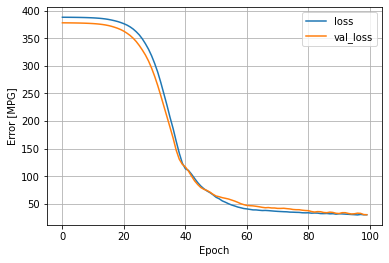

In [38]:
plot_loss(history)

In [39]:
test_results['big_bdnn_model'] = big_dnn_model.evaluate(x_test, y_test, verbose=0)

2/2 [==============================] - 0s 2ms/step


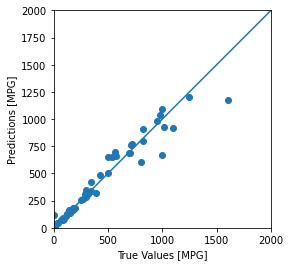

In [40]:
test_predictions = big_dnn_model.predict(x_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 2000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

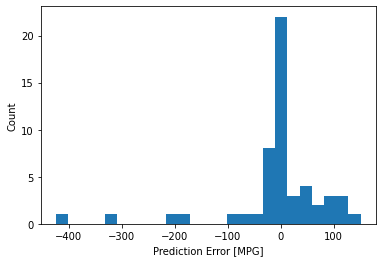

In [41]:
error = test_predictions - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

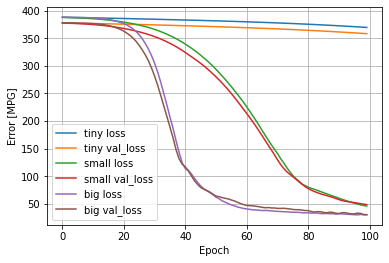

In [42]:
# plot_loss(historys)
for i in historys:
    plt.plot(historys[i].history['loss'], label= i + ' loss')
    plt.plot(historys[i].history['val_loss'], label= i + ' val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

Text(0.5, 0, 'Epochs [Log Scale]')

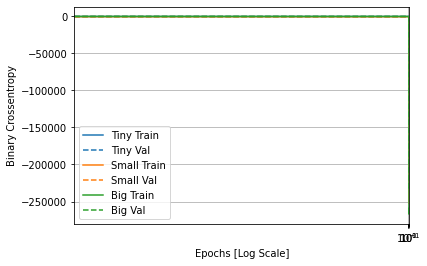

In [43]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'binary_crossentropy', smoothing_std=10)
plotter.plot(historys)
a = plt.xscale('log')
plt.xlabel("Epochs [Log Scale]")

In [ ]:
big_model_r = keras.Sequential([
        normalizer,
        layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
        layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
        layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
        layers.Dense(5, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
        layers.Dense(5, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
        layers.Dense(1)
    ])
big_dnn_model = compile_model(big_model)